<a href="https://colab.research.google.com/github/carolynchep/NumericalAnalysis/blob/main/Error_Analysis_of_Riemann_Sum_Variants_for_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.32: Write code to approximate an integral with Riemann sums. You should ALWAYS start by writing pseudo-code as comments in your function. Your Python function should accept a Python Function, a lower bound, an upper bound, the number of subintervals, and an optional input that allows the user to designate whether they want left, right, or midpoint rectangles. Test your code on several functions for which you know the integral. You should write your code without any loops.

In [1]:
import numpy as np
import matplotlib.pyplot as plt



def riemannSum(f:'function', lower: int, upper:int, interval, riemann: str ='middle'):
  """
    Approximates the integral of a function using specified Riemann sum method.

    Parameters:
    - f: Function to integrate
    - lower: Lower bound of integration
    - upper: Upper bound of integration
    - interval: Number of subintervals
    - riemann: Type of Riemann sum ('middle', 'left', 'right', 'trapezoid_google', 'trapezoid_book')

    Returns:
    - Approximation of the integral
  """
  points = np.linspace(lower, upper, interval+1)
  n = points[1] - points[0]
  list_riemann = []
  if riemann == 'middle':
    half = n/2
    #right side -left side function * interval
    for i in range(len(points)-1):
      mid = points[i] + half
      list_riemann.append(f(mid)*(n))
  if riemann == 'left':
    #right side -left side function * interval
    for i in range(len(points)-1):
      left = points[i]
      list_riemann.append(f(left)*(n))
  if riemann == 'right':
    #right side -left side function * interval
    for i in range(1,len(points)):
      right = points[i]
      list_riemann.append(f(right)*(n))
  if riemann == 'trapezoid':
    list_riemann.append(f(points[0]))
    list_riemann.append(f(points[-1]))
    for i in range(1,len(points)-1):
      trap = points[i]
      list_riemann.append(2*f(trap))

    return (n/2)*sum(list_riemann)

  return sum(list_riemann)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#same function as above, but different methods used for the Trapeziod

def riemannSum(f:'function', lower: int, upper:int, interval: int, riemann: str ='middle'):
  points = np.linspace(lower, upper, interval+1)
  n = points[1] - points[0]
  list_riemann = []
  if riemann == 'middle':
    half = n/2
    #right side -left side function * interval
    for i in range(len(points)-1):
      mid = points[i] + half
      list_riemann.append(f(mid)*(n))
  elif riemann == 'left':
    #right side -left side function * interval
    for i in range(len(points)-1):
      left = points[i]
      list_riemann.append(f(left)*(n))
  elif riemann == 'right':
    #right side -left side function * interval
    for i in range(1,len(points)):
      right = points[i]
      list_riemann.append(f(right)*(n))
  elif riemann == 'trapezoid_google':
    list_riemann.append(f(points[0]))
    list_riemann.append(f(points[-1]))
    for i in range(1,len(points)-1):
      trap = points[i]
      list_riemann.append(2*f(trap))

    return (n/2)*sum(list_riemann)

  elif riemann == 'trapezoid_book':
    for i in range(len(points)-1):
      trap = .5*(f(points[i+1])+f(points[i]))*(points[i+1]-points[i])
      list_riemann.append(trap)

    return sum(list_riemann)
  else:
    raise TypeError(f"You can either make riemann equal 'middle', 'left', 'right', 'trapezoid_google', or 'trapezoid_book'")

  return sum(list_riemann)

[link text](https://)Problem 1)

In [ ]:
#Test function

h = lambda x: (1/5)*(x**2)*(5-x)

a1 = riemannSum(h, 1, 4, 3, "middle")
a2 = riemannSum(h, 1, 4, 3, "left")
a3 = riemannSum(h, 1, 4, 3, "right")
# exact = 8.25, l = 6.8, r = 9.2, m = 8.375

print(f'Middle = {a1}\nLeft = {a2}\nRight = {a3}')

f = lambda x: np.exp(3*x)*np.sin(2*x)

approx1 = riemannSum(f,0,np.pi/4,125,'middle')
approx2 = riemannSum(f,0,np.pi/4,125,'left')
approx3 = riemannSum(f,0,np.pi/4,125,'right')
approx4 = riemannSum(f,0,np.pi/4,125,'trapezoid_google')
approx5 = riemannSum(f,0,np.pi/4,125,'trapezoid_book')

print('#'*30)
print(f'Middle = {approx1}\nLeft = {approx2}\nRight = {approx3}')
print('#'*30)



Middle = 8.375
Left = 6.800000000000001
Right = 9.2
##############################
Middle = 2.588579856371963
Left = 2.5555801073072217
Right = 2.621872261790327
##############################


Problem 2)

h = 0.5 	 Absolute Pct Error = 0.07489295992547869
h = 0.25 	 Absolute Pct Error = 0.018494574151066707 with error reduction 4.049455765444542
h = 0.125 	 Absolute Pct Error = 0.0046062614883549055 with error reduction 4.015094279346246
h = 0.0625 	 Absolute Pct Error = 0.0011504293844958225 with error reduction 4.003949786430053
h = 0.03125 	 Absolute Pct Error = 0.00028753556687108935 with error reduction 4.000998544335191
h = 0.015625 	 Absolute Pct Error = 7.187939330775498e-05 with error reduction 4.000250330995316
h = 0.0078125 	 Absolute Pct Error = 1.7969566985271365e-05 with error reduction 4.00006262625418
h = 0.00390625 	 Absolute Pct Error = 4.49237415947484e-06 with error reduction 4.000015659286049
h = 0.001953125 	 Absolute Pct Error = 1.1230924408518542e-06 with error reduction 4.000003914252526
h = 0.0009765625 	 Absolute Pct Error = 2.8077304099098483e-07 with error reduction 4.000000986162752
h = 0.00048828125 	 Absolute Pct Error = 7.019325643067303e-08 with error r

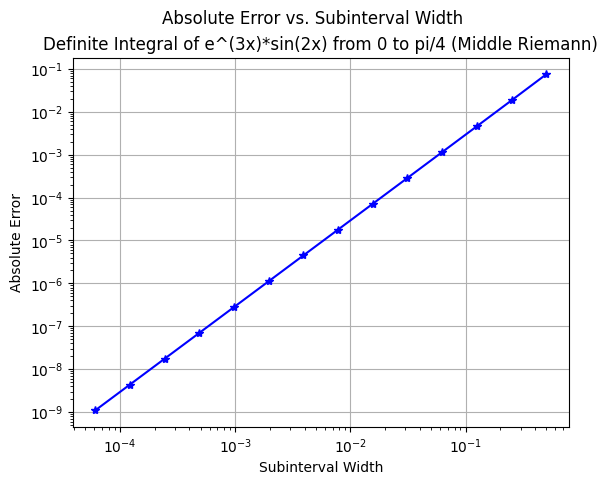

h = 0.5 	 Absolute Pct Error = 0.6515694150522022
h = 0.25 	 Absolute Pct Error = 0.3632311874888405 with error reduction 1.7938146213621051
h = 0.125 	 Absolute Pct Error = 0.19086288081995362 with error reduction 1.9031002043372005
h = 0.0625 	 Absolute Pct Error = 0.09773457115415426 with error reduction 1.9528696812810529
h = 0.03125 	 Absolute Pct Error = 0.04944250026932513 with error reduction 1.976731973944899
h = 0.015625 	 Absolute Pct Error = 0.02486501791809811 with error reduction 1.9884361407734275
h = 0.0078125 	 Absolute Pct Error = 0.012468448655702674 with error reduction 1.9942350973010292
h = 0.00390625 	 Absolute Pct Error = 0.006243209111344831 with error reduction 1.9971217419332736
h = 0.001953125 	 Absolute Pct Error = 0.003123850742752153 with error reduction 1.9985619113941673
h = 0.0009765625 	 Absolute Pct Error = 0.0015624869175960734 with error reduction 1.9992812148202035
h = 0.00048828125 	 Absolute Pct Error = 0.0007813838453187895 with error reduction

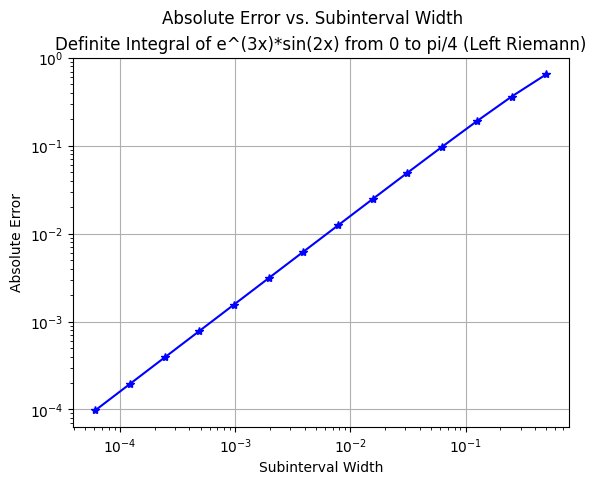

h = 0.5 	 Absolute Pct Error = 0.9489922117351803
h = 0.25 	 Absolute Pct Error = 0.43704962590485064 with error reduction 2.171360311247089
h = 0.125 	 Absolute Pct Error = 0.20927752587689197 with error reduction 2.088373436533965
h = 0.0625 	 Absolute Pct Error = 0.10233563219426853 with error reduction 2.0450113160937984
h = 0.03125 	 Absolute Pct Error = 0.05059260140488618 with error reduction 2.0227390834341454
h = 0.015625 	 Absolute Pct Error = 0.025152532919007632 with error reduction 2.011431674408172
h = 0.0078125 	 Absolute Pct Error = 0.01254032676285011 with error reduction 2.0057318596769225
h = 0.00390625 	 Absolute Pct Error = 0.006261178597931562 with error reduction 2.0028699975102007
h = 0.001953125 	 Absolute Pct Error = 0.0031283431118861293 with error reduction 2.0014360234790853
h = 0.0009765625 	 Absolute Pct Error = 0.0015636100097229818 with error reduction 2.0007182688990106
h = 0.00048828125 	 Absolute Pct Error = 0.000781664618340738 with error reduction 

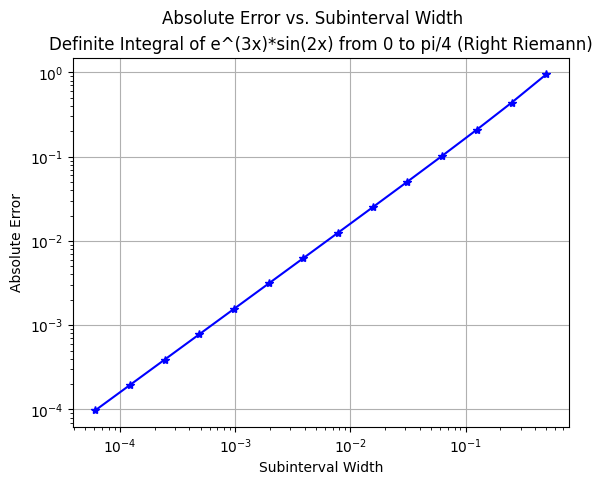

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Analytical solution to the integral of e^(3x)*sin(2x)
exact_f = lambda x: (-2*np.exp(3*x)*np.cos(2*x))/13 + (3*np.exp(3*x)*np.sin(2*x))/13

# Upper limit of integration (pi/4) and its numerical value
pi_4 = np.pi / 4

# Define the function to integrate: e^(3x)*sin(2x)
f = lambda x: np.exp(3*x)*np.sin(2*x)  # Target function to approximate numerically

# Compute the exact value of the definite integral using the analytical solution
exact = exact_f(pi_4) - exact_f(0)

# Generate a range of subinterval counts for numerical integration (H = 2, 4, ..., 2^14)
H = 2.0**np.arange(1, 15)

# Initialize an empty list to store absolute percentage errors
AbsPctError = []

# Perform numerical integration using the middle Riemann sum
for h in H:
    # Compute the Riemann sum approximation for h subintervals
    approx = riemannSum(f, 0, pi_4, int(h), 'middle')

    # Calculate the absolute percentage error for the current approximation
    AbsPctError.append(np.abs((approx - exact) / exact))

    # Print details of the error and its reduction factor (if applicable)
    if h == H[0]:  # No reduction factor for the first interval
        print("h =", h**(-1), "\t Absolute Pct Error =", AbsPctError[-1])
    else:
        err_reduction_factor = AbsPctError[-2] / AbsPctError[-1]
        print("h =", h**(-1), "\t Absolute Pct Error =", AbsPctError[-1],
              "with error reduction", err_reduction_factor)

# Plot the absolute error vs subinterval width on a log-log scale
plt.loglog(H**(-1), AbsPctError, 'b-*')
plt.grid()
plt.suptitle("Absolute Error vs. Subinterval Width")
plt.title("Definite Integral of e^(3x)*sin(2x) from 0 to pi/4 (Middle Riemann)")
plt.xlabel("Subinterval Width")
plt.ylabel("Absolute Error")
plt.show()

# Repeat the process for the left Riemann sum
H = 2.0**np.arange(1, 15)
AbsPctError = []  # Reset error list

for h in H:
    approx = riemannSum(f, 0, pi_4, int(h), 'left')
    AbsPctError.append(np.abs((approx - exact) / exact))

    if h == H[0]:
        print("h =", h**(-1), "\t Absolute Pct Error =", AbsPctError[-1])
    else:
        err_reduction_factor = AbsPctError[-2] / AbsPctError[-1]
        print("h =", h**(-1), "\t Absolute Pct Error =", AbsPctError[-1],
              "with error reduction", err_reduction_factor)

plt.loglog(H**(-1), AbsPctError, 'b-*')
plt.grid()
plt.suptitle("Absolute Error vs. Subinterval Width")
plt.title("Definite Integral of e^(3x)*sin(2x) from 0 to pi/4 (Left Riemann)")
plt.xlabel("Subinterval Width")
plt.ylabel("Absolute Error")
plt.show()

# Repeat the process for the right Riemann sum
H = 2.0**np.arange(1, 15)
AbsPctError = []  # Reset error list

for h in H:
    approx = riemannSum(f, 0, pi_4, int(h), 'right')
    AbsPctError.append(np.abs((approx - exact) / exact))

    if h == H[0]:
        print("h =", h**(-1), "\t Absolute Pct Error =", AbsPctError[-1])
    else:
        err_reduction_factor = AbsPctError[-2] / AbsPctError[-1]
        print("h =", h**(-1), "\t Absolute Pct Error =", AbsPctError[-1],
              "with error reduction", err_reduction_factor)

plt.loglog(H**(-1), AbsPctError, 'b-*')
plt.grid()
plt.suptitle("Absolute Error vs. Subinterval Width")
plt.title("Definite Integral of e^(3x)*sin(2x) from 0 to pi/4 (Right Riemann)")
plt.xlabel("Subinterval Width")
plt.ylabel("Absolute Error")
plt.show()


The plot demonstrates the order of error by displaying a slope that is almost one and proportional. If you look at the error reduction for the left and right aligned riemann sum, you can see that the error reduction converges to 2, thus, the Riemann summ has a first-order of error. This isn't the case for the midpoint aligned riemann sum because the error reduction converges to 4. Visually, the middle Rieman is mroe accurate and a better approximation of the integral, thus, it makes sense that it has a second order error.

Problem 3)
∫π/4 0 e^3x*sin(2x)dx
trapezoid

In [3]:
approx4 = riemannSum(f,0,np.pi/4,125,'trapezoid_google')
approx5 = riemannSum(f,0,np.pi/4,125,'trapezoid_book')

print('#'*30)
print(f'Trapezoid_google = {approx4}\nTrapezoid1_book = {approx5}')
print('#'*30)

##############################
Trapezoid_google = 0
Trapezoid1_book = 0
##############################


Problem 4)

h= 0.3333333333333333 	 Absolute Pct Error= 0.06575400823108124
h= 0.1111111111111111 	 Absolute Pct Error= 0.0072737782188824806 with error reduction 9.039869824513769
h= 0.037037037037037035 	 Absolute Pct Error= 0.000807768361519476 with error reduction 9.004782268520557
h= 0.012345679012345678 	 Absolute Pct Error= 8.974669760980157e-05 with error reduction 9.000535763794574
h= 0.00411522633744856 	 Absolute Pct Error= 9.971789272415462e-06 with error reduction 9.000059583896748
h= 0.0013717421124828531 	 Absolute Pct Error= 1.1079757712100111e-06 with error reduction 9.000006617044843
h= 0.0004572473708276177 	 Absolute Pct Error= 1.2310840966411893e-07 with error reduction 9.000000684217602
h= 0.00015241579027587258 	 Absolute Pct Error= 1.3678710926840532e-08 with error reduction 9.000000827750085
h= 5.080526342529086e-05 	 Absolute Pct Error= 1.5198592095259353e-09 with error reduction 8.999985552021695
h= 1.6935087808430286e-05 	 Absolute Pct Error= 1.6887863991840818e-10 with

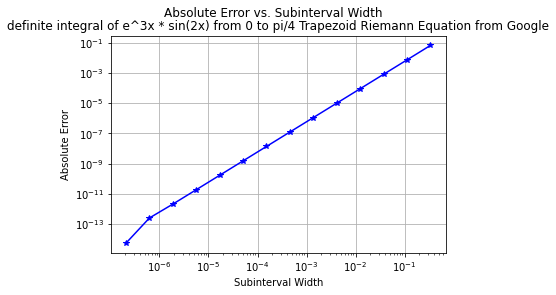

h= 0.5 	 Absolute Pct Error= 0.14871139834148878
h= 0.25 	 Absolute Pct Error= 0.03690921920800505 with error reduction 4.029112550536846
h= 0.125 	 Absolute Pct Error= 0.009207322528469172 with error reduction 4.008681035543311
h= 0.0625 	 Absolute Pct Error= 0.002300530520057047 with error reduction 4.0022605430337235
h= 0.03125 	 Absolute Pct Error= 0.0005750505677806124 with error reduction 4.000570817512388
h= 0.015625 	 Absolute Pct Error= 0.00014375750045501884 with error reduction 4.000143060087105
h= 0.0078125 	 Absolute Pct Error= 3.59390535733746e-05 with error reduction 4.000035787295228
h= 0.00390625 	 Absolute Pct Error= 8.984743293794287e-06 with error reduction 4.000008948302119
h= 0.001953125 	 Absolute Pct Error= 2.2461845670739466e-06 with error reduction 4.000002237348869
h= 0.0009765625 	 Absolute Pct Error= 5.615460632826e-07 with error reduction 4.0000005590699805
h= 0.00048828125 	 Absolute Pct Error= 1.4038651114580756e-07 with error reduction 4.000000133199191

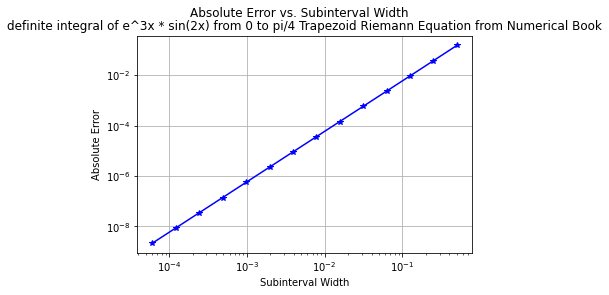

In [ ]:
exact_f = lambda x: (-2*np.exp(3*x)*np.cos(2*x))/13+ (3*np.exp(3*x)*np.sin(2*x))/13
pi_4 = np.pi/4
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(3*x)*np.sin(2*x) # what does this line do?
exact = ((-2*np.exp(3*pi_4)*np.cos(2*pi_4))/13+ (3*np.exp(3*pi_4)*np.sin(2*pi_4))/13) - ((-2*np.exp(3*0)*np.cos(2*0))/13+ (3*np.exp(3*0)*np.sin(2*0))/13) # what does this line do?
H = 3.0**np.arange(1,15) # what does this line do?
AbsPctError = [] # start off with a blank list of errors


for h in H:
    approx = riemannSum(f,0,pi_4,int(h),'trapezoid_google')
    AbsPctError.append( np.abs( (approx - exact)/exact ) )
    if h==H[0]:
      print("h=",h**(-1),"\t Absolute Pct Error=", AbsPctError[-1])
    else:
      err_reduction_factor = AbsPctError[-2]/AbsPctError[-1]
      print("h=",h**(-1),"\t Absolute Pct Error=", AbsPctError[-1],
              "with error reduction",err_reduction_factor)
plt.loglog(H**(-1),AbsPctError,'b-*') # Why are we build a loglog plot?
plt.grid()
plt.suptitle("Absolute Error vs. Subinterval Width")
plt.title("definite integral of e^3x * sin(2x) from 0 to pi/4 Trapezoid Riemann Equation from Google")
plt.xlabel("Subinterval Width")
plt.ylabel("Absolute Error")
plt.show()

H = 2.0**(np.arange(1,15)) # what does this line do?
AbsPctError = [] # start off with a blank list of errors
for h in H:
    approx = riemannSum(f,0,pi_4,int(h),'trapezoid_book')
    AbsPctError.append( np.abs( (approx - exact)/exact ) )
    if h==H[0]:
      print("h=",h**(-1),"\t Absolute Pct Error=", AbsPctError[-1])
    else:
      err_reduction_factor = AbsPctError[-2]/AbsPctError[-1]
      print("h=",h**(-1),"\t Absolute Pct Error=", AbsPctError[-1],
              "with error reduction",err_reduction_factor)
plt.loglog(H**(-1),AbsPctError,'b-*') # Why are we build a loglog plot?
plt.grid()
plt.suptitle("Absolute Error vs. Subinterval Width")
plt.title("definite integral of e^3x * sin(2x) from 0 to pi/4 Trapezoid Riemann Equation from Numerical Book")
plt.xlabel("Subinterval Width")
plt.ylabel("Absolute Error")
plt.show()

When we divide the interval by a factor of 2 and the error reduction is 4 and we divide the interval by a factor of 3 and the error reduction is 9. Similar to the loglog plot for the middle Riemann Sum, this slope is almost two and it's a better approximation of the integral, thus, this order of error makes sense.